In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv("F:\\mysql\\py-master\\py-master\\ML\\13_kmeans\\income.csv")

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
df=df.drop("Name",axis="columns")

In [7]:
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


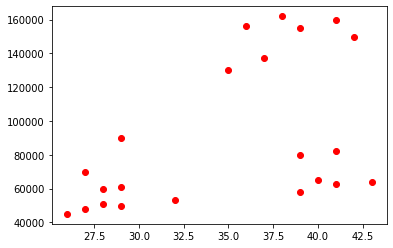

In [9]:
plt.scatter(df.Age,df["Income($)"],color="Red")

In [10]:
km=KMeans(n_clusters=3)

In [11]:
y_predicted=km.fit_predict(df)

In [12]:
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [13]:
df["Cluster"]=y_predicted

In [15]:
df.head()

,Age,Income($),Cluster
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1


In [25]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

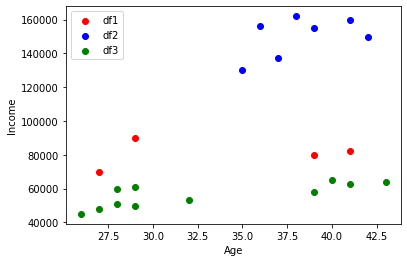

In [38]:
plt.scatter(df1.Age,df1["Income($)"],color="red")
plt.scatter(df2.Age,df2["Income($)"],color="blue")
plt.scatter(df3.Age,df3["Income($)"],color="green")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(["df1","df2","df3"])

In [41]:
scaler=MinMaxScaler()

In [50]:
scaler.fit(df[["Age"]])

MinMaxScaler()

In [53]:
df["Age"]=scaler.transform(df[["Age"]])

In [55]:
df.head()

,Age,Income($),Cluster
0,0.058824,70000,0
1,0.176471,90000,0
2,0.176471,61000,2
3,0.117647,60000,2
4,0.941176,150000,1


In [56]:
scaler.fit(df[["Income($)"]])
df["Income($)"]=scaler.transform(df[["Income($)"]])

In [58]:
df.head()

,Age,Income($),Cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1


In [59]:
df=df.drop("Cluster",axis="columns")

In [61]:
df.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [64]:
km1=KMeans(n_clusters=3)
y_pred=km1.fit_predict(df)

In [65]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [101]:
df["Clusters"]=y_pred
km1.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [102]:
df.head()

,Age,Income($),Clusters
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


In [103]:
df1=df[df.Clusters==0]
df2=df[df.Clusters==1]
df3=df[df.Clusters==2]

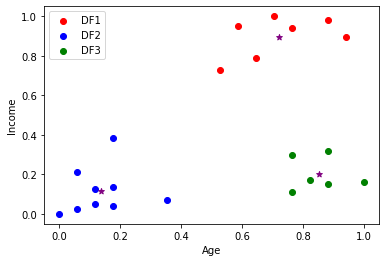

In [107]:
plt.scatter(df1.Age,df1["Income($)"],color="red")
plt.scatter(df2.Age,df2["Income($)"],color="blue")
plt.scatter(df3.Age,df3["Income($)"],color="green")
plt.scatter(km1.cluster_centers_[0:,0],km1.cluster_centers_[0:,1],color="Purple",marker="*",label="Centroid")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(["DF1","DF2","DF3"])

In [110]:
km1.cluster_centers_[0:,0],km1.cluster_centers_[0:,1]


(array([0.72268908, 0.1372549 , 0.85294118]),
 array([0.8974359 , 0.11633428, 0.2022792 ]))

In [123]:
sse=[]
a=[]
for k in range(1,11):
    km2=KMeans(n_clusters=k)
    km2.fit(df[["Age","Income($)"]])
    sse.append(km2.inertia_)
    a.append(k)


In [124]:
k

10

Text(0, 0.5, 'Sum of Squared Errors')

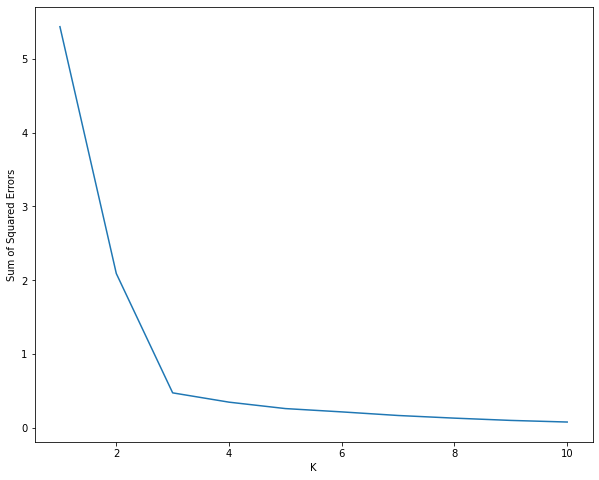

In [128]:
plt.figure(figsize=(10,8))
plt.plot(a,sse)
plt.xlabel("K")
plt.ylabel("Sum of Squared Errors")

In [129]:
km1.cluster_centers_[0:,1]

array([0.8974359 , 0.11633428, 0.2022792 ])